# Introduction

The Project is to build a model to improve the Zestimate residual error. 

   $ logerror=log(Zestimate)−log(SalePrice) $ 

“Zestimates” are Zillow's estimated home values. The model is to predict the difference between the Zillow's estimated home value, Zestimate, and the actual sale price. 

## Data

We have 4 files. We merge properties_2016.csv and train_2016.csv to make a training data which has 90275 data points(houses). For a test data, we merge properties_2017.csv and train_2017.csv. The test data has 77613 data points.  

   **properties_2016.csv**: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, 
                           California) data in 2016.

   **train_2016.csv**: all the transactions before October 15, 2016, plus some of the transactions after October 
                      15,2016. It contains parcel ID ,  transaction date and calculated log error . 

   **properties_2017.csv**: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura,
                           California) data in 2017.

   **train_2017.csv**: all the transactions from Jan 1, 2017 to Sep 25, 2017. It can be used as a test dataset.



In [70]:
#import a necessary module

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

# read files

path_properties_2016 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/properties_2016.csv'
df_properties_2016 = pd.read_csv(path_properties_2016, low_memory=False)

path_train_2016 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/train_2016.csv'
df_train_2016 = pd.read_csv(path_train_2016 , parse_dates=["transactiondate"], low_memory=False)

path_properties_2017 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/properties_2017.csv'
df_properties_2017 = pd.read_csv(path_properties_2017, low_memory=False)

path_train_2017 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/train_2017.csv'
df_train_2017 = pd.read_csv(path_train_2017 , parse_dates=["transactiondate"],low_memory=False)

In [71]:
# merge training and properties data for 2016 and 2017

df_train_2016 = pd.merge(df_train_2016, df_properties_2016, how='inner', on='parcelid')
df_test_2017 = pd.merge(df_train_2017, df_properties_2017, how='inner', on='parcelid')

In [72]:
# Shape of train data

df_train_2016.shape

(90275, 60)

In [73]:
# Shape of test data

df_test_2017.shape

(77613, 60)

In [74]:
df_train_2016.head().transpose()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
airconditioningtypeid,1,NaN,1,1,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4,4,NaN


In [75]:
df_train_2016.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,90275.0,1.298466e+07,2.504510e+06,1.071174e+07,1.155950e+07,1.254734e+07,1.422755e+07,1.629608e+08
logerror,90275.0,1.145722e-02,1.610788e-01,-4.605000e+00,-2.530000e-02,6.000000e-03,3.920000e-02,4.737000e+00
airconditioningtypeid,28781.0,1.816372e+00,2.974168e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,261.0,7.229885e+00,2.716196e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,43.0,7.135814e+02,4.374342e+02,1.000000e+02,4.075000e+02,6.160000e+02,8.720000e+02,1.555000e+03
bathroomcnt,90275.0,2.279474e+00,1.004271e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,90275.0,3.031869e+00,1.156436e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,16.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,57364.0,5.565407e+00,1.900602e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,89093.0,2.309216e+00,9.761725e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


In [76]:
df_train_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

# Data Wrangling

## Data Cleaning

I explored training data. 125 duplicated parcelid for 2016 data and 199 duplicated parcelid for 2017 data were found. However, it meant they were trasacted for more than twice for a year. so it didn't have any problem.



In [77]:
df_train_2016.shape
sum(df_train_2016.duplicated('parcelid'))

125

In [78]:
df_test_2017.shape
sum(df_train_2017.duplicated('parcelid'))

199

In [79]:
# Check if negative values in each column. Two columns, logerror and longitude, have negative values which are reasonable. 

df_train_2016.describe().loc["min",:][ df_train_2016.describe().loc["min",:] < 0 ]

logerror    -4.605000e+00
longitude   -1.194479e+08
Name: min, dtype: float64

In [80]:
# Check if columns with object type have unusual cells. 

# there are 5 columns with a object type

df_train_2016.loc[:, df_train_2016.dtypes == np.object].columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [81]:
# check 5 columns to see if they have unnual cells. 

df_train_2016["hashottuborspa"].unique() , df_train_2016["propertycountylandusecode"].unique() , df_train_2016["propertyzoningdesc"].unique(), df_train_2016["fireplaceflag"].unique(), df_train_2016["taxdelinquencyflag"].unique()

(array([nan, True], dtype=object),
 array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
        '0101', '0200', '0700', '1111', '01DC', '010D', '1110', '0400',
        '012C', '010V', '1116', '01HC', '010G', '0300', '010F', '1117',
        '0103', '38', '1210', '0111', '010M', '96', '135', '0108', '1014',
        '1112', '0201', '0109', '1310', '010H', '1410', '1222', '1321',
        '1720', '1011', '1432', '0401', '0102', '012D', '73', '105',
        '0110', '100V', '0130', '8800', '0303', '0210', '1012', '1333',
        '0114', '01DD', '020G', '040A', '012E', '020M', '040V', '070D',
        '1200', '030G', '1722', '6050', '1421', '010', nan, '200', '0',
        '1420', '0131', '0301'], dtype=object),
 array(['LARS', nan, 'PSR6', ..., 'SHCG', 'COR2YY', 'LNR2RPD-R3'],
       dtype=object),
 array([nan, True], dtype=object),
 array([nan, 'Y'], dtype=object))

## Missing Values

Let's check how many missing value each column has. 

We can find that 47 columns have missing values.

18 columns among them have more than 95% of missing values and 29 columns with more than 60% of missing values


In [82]:
df_2016_missing = df_train_2016.isnull().sum(axis=0).reset_index()
df_2016_missing.columns = ["index",'missing_values']


df_2016_missing = df_2016_missing[df_2016_missing.missing_values != 0]
df_2016_missing['ratio'] =df_2016_missing['missing_values']/len(df_train_2016)

missing_values = df_2016_missing.sort_values(by='ratio', ascending=False )
missing_values

,index,missing_values,ratio
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
5,basementsqft,90232,0.999524
43,storytypeid,90232,0.999524
48,yardbuildingsqft26,90180,0.998948
51,fireplaceflag,90053,0.997541
4,architecturalstyletypeid,90014,0.997109
45,typeconstructiontypeid,89976,0.996688
18,finishedsquarefeet6,89854,0.995336
11,decktypeid,89617,0.992711


In [83]:
len(missing_values[missing_values['ratio']>0.95])

18

In [84]:
len(missing_values[missing_values['ratio']>0.60])

29

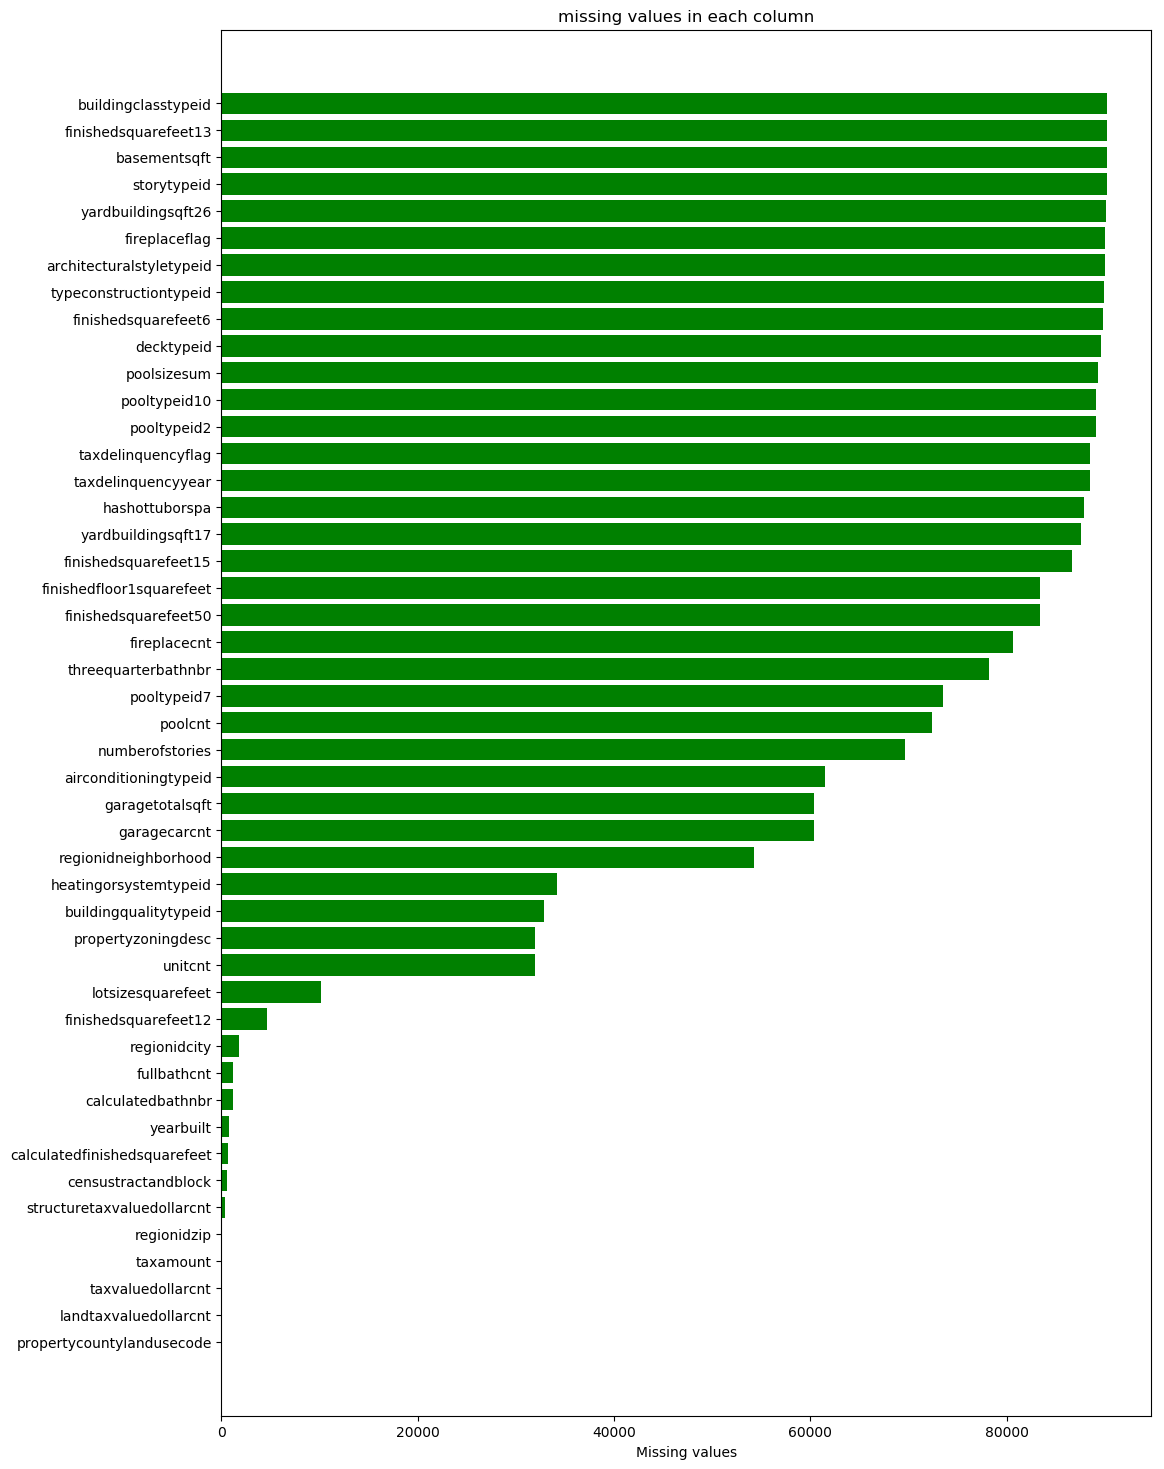

In [85]:
# Draw horizontal Bar plot for missing values

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,18))

y_pos = np.arange(len(missing_values))


ax.barh(y_pos, missing_values['missing_values'],   color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(missing_values['index'].values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Missing values')
ax.set_title('missing values in each column')

plt.show()





## Outliers

Let's draw a scatter plot on "logerror", then we can find that there are some outliers at the end of both sides. 

Our task in the project is to find where the zillow algorithm fails. These outliers mean where the zillow algorithm fails the most, it can have important information.  Thus, I will leave outliers just like that. 


In [86]:
range(df_train_2016.shape[0])

range(0, 90275)

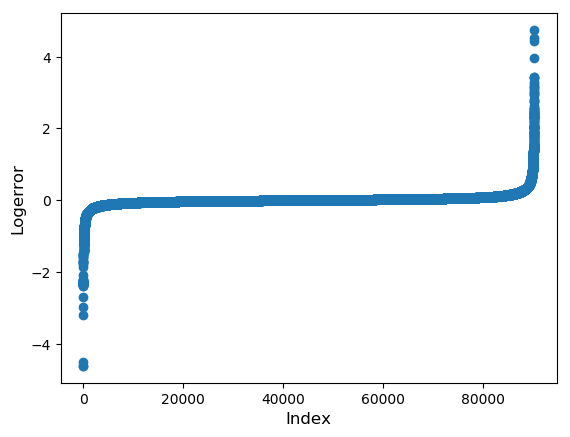

In [87]:
plt.scatter(range(df_train_2016.shape[0]), df_train_2016.sort_values(by='logerror')['logerror'])
plt.xlabel('Index', fontsize=12)
plt.ylabel('Logerror', fontsize=12)
plt.show()

In [88]:
df_train_2016.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [89]:
freq_table = pd.DataFrame(0,index = range(-4,6),columns = range(1))



for i in range(df_train_2016.shape[0]):
    if df_train_2016.logerror[i] < -4 :
        freq_table[0][-4] += 1
    elif df_train_2016.logerror[i] < -3:
        freq_table[0][-3] += 1
    elif df_train_2016.logerror[i] < -2:
        freq_table[0][-2] += 1
    elif df_train_2016.logerror[i] < -1:
        freq_table[0][-1] += 1
    elif df_train_2016.logerror[i] < 0:
        freq_table[0][0] += 1
    elif df_train_2016.logerror[i] < 1:
        freq_table[0][1] += 1
    elif df_train_2016.logerror[i] < 2:
        freq_table[0][2] += 1
    elif df_train_2016.logerror[i] < 3:
        freq_table[0][3] += 1
    elif df_train_2016.logerror[i] < 4:
        freq_table[0][4] += 1
    else :
        freq_table[0][5] += 1
        
        

In [115]:
pd.cut(df_train_2016.logerror, 10).value_counts()

(-0.868, 0.066]     76615
(0.066, 1.0]        13271
(1.0, 1.934]          158
(-1.802, -0.868]      115
(1.934, 2.869]         51
(-2.737, -1.802]       43
(2.869, 3.803]         13
(3.803, 4.737]          4
(-4.614, -3.671]        3
(-3.671, -2.737]        2
Name: logerror, dtype: int64

In [90]:
freq_table

,0
-4,3
-3,1
-2,43
-1,69
0,39551
1,50382
2,160
3,52
4,11
5,3


# Data Storytelling

## Distribution of Logerror

We would check both logerror and absolute value of logerror. Logerror indicates wheather estimated house values has been underestimated or overestimated while absolute logerror tells us that how estimated house value is close to an actual house value. It seems like the distribution of logerror follows a normal distribution. 

In [113]:
df_train_2016.shape

(90275, 61)

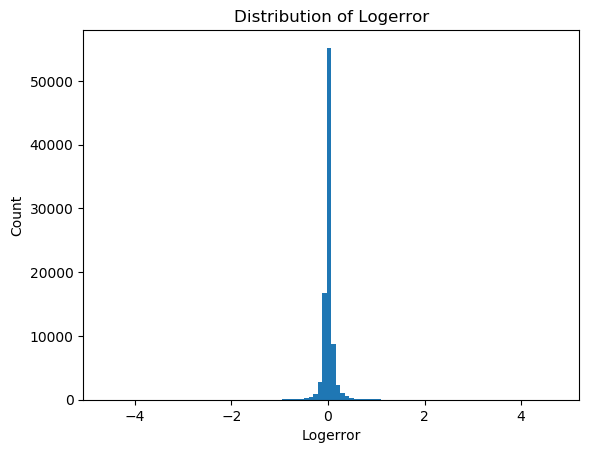

In [91]:
#Distribution of Logerror

plt.hist(df_train_2016.logerror,100)
plt.title("Distribution of Logerror")
plt.xlabel("Logerror")
plt.ylabel("Count")
plt.show()

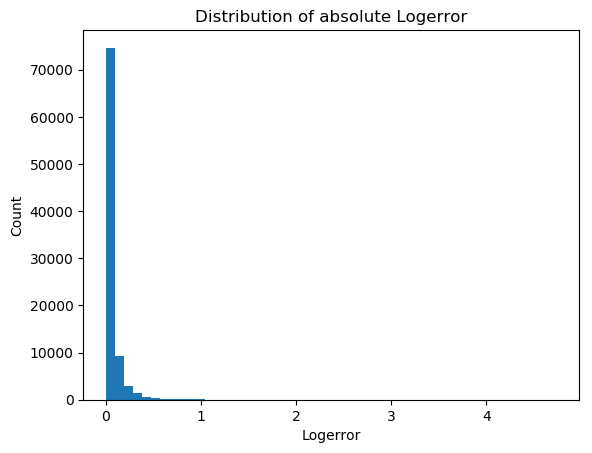

In [92]:
#Distribution of absolute Logerror

plt.hist(abs(df_train_2016.logerror),50)
plt.title("Distribution of absolute Logerror")
plt.xlabel("Logerror")
plt.ylabel("Count")
plt.show()

## Transaction dates

Let's check the distribution of transaction dates, there are fewer transactions after October

In [93]:
df_train_2016.shape

(90275, 60)

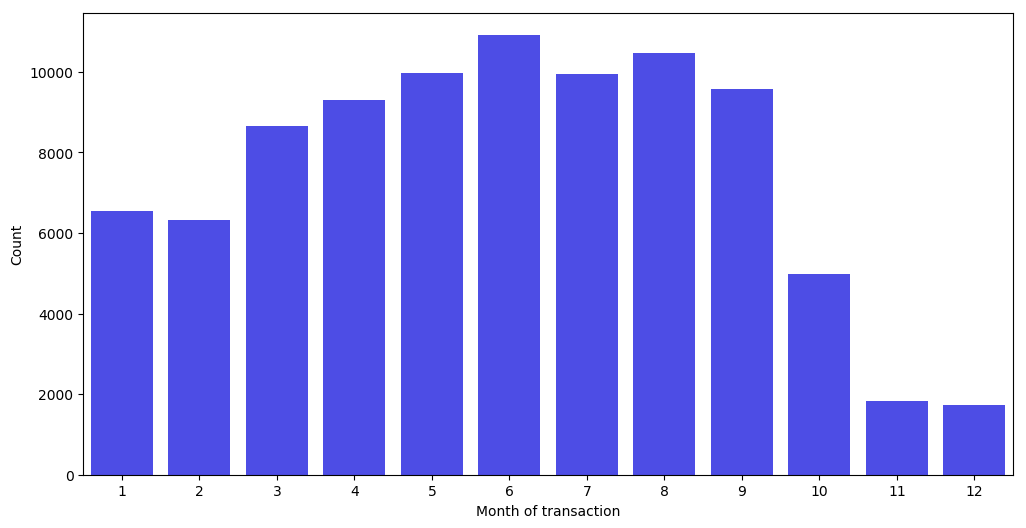

In [94]:
#Distribution of transaction dates

trs_month = df_train_2016['transactiondate'].dt.month.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(trs_month.index, trs_month.values, alpha=0.8,color ='blue' )

plt.xlabel('Month of transaction')
plt.ylabel('Count')
plt.show()



## Correlation

Let's check correlations to "logerror" to see how variables are related. Square of basement and year built are the top 2 variables which have high correlations. 


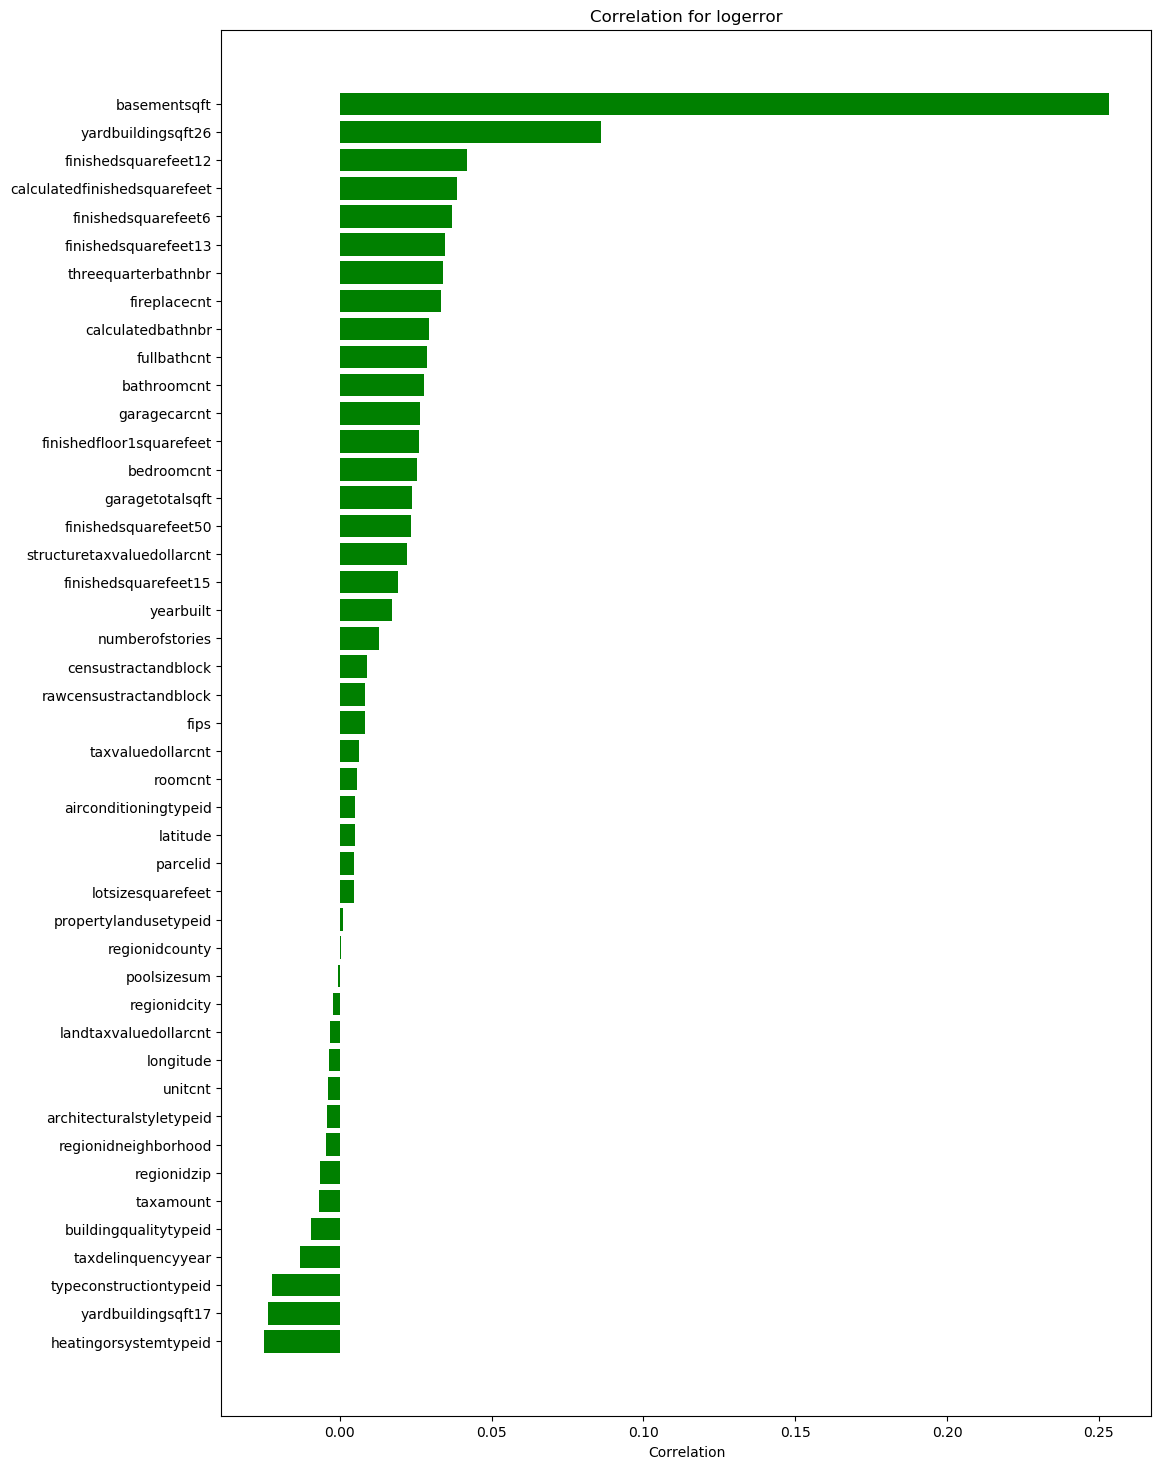

In [95]:
# Correlations for logerror with missing values

corr = df_train_2016.corr()

corr_logerror = corr.loc["logerror",:] [ corr.loc["logerror",:].notnull() ].reset_index()
corr_logerror.columns = ["index",'corr']
corr_logerror_sorted = corr_logerror.sort_values(by='corr', ascending=False )[1:]



plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,18))

y_pos = np.arange(len(corr_logerror_sorted))


ax.barh(y_pos, corr_logerror_sorted['corr'],   color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(corr_logerror_sorted['index'].values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Correlation for logerror')

plt.show()



# Let's explore Variables


## Number of Bedroom

It seems logerror is high when number of bedroom is 4. 

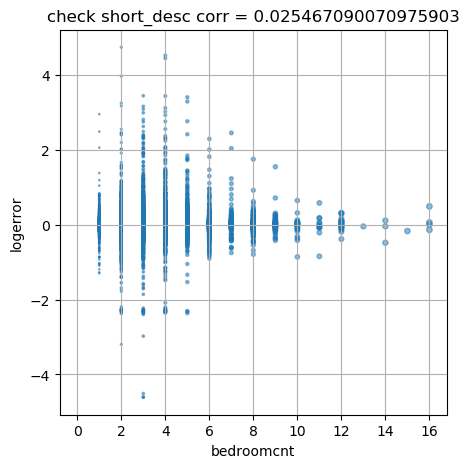

In [96]:
y= df_train_2016['logerror']
x= df_train_2016['bedroomcnt']
s= df_train_2016['bedroomcnt']

corr = np.corrcoef(x, y)[0, 1]
plt.figure(figsize=(5,5))
plt.title('check short_desc corr = %s'%corr)
plt.xlabel('bedroomcnt')
plt.ylabel('logerror')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)
plt.show()

## Lattitude and longitude

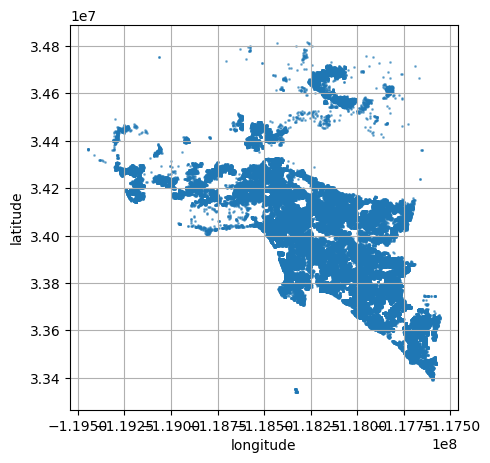

In [97]:
y= df_train_2016['latitude']
x= df_train_2016['longitude']
s=1
plt.figure(figsize=(5,5))

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)
plt.show()

##  Type of cooling system present in the home

There are 61494 missing values out of 90275. I filled missing values with 0 to see how logerror is related to type of cooling system.  Logerror is low when cooling system > 1

Type of cooling system is like below. 
1	Central, 
2	Chilled Water,
3	Evaporative Cooler,
4	Geo Thermal,
5	None,
6	Other,
7	Packaged AC Unit,
8	Partial,
9	Refrigeration,
10	Ventilation,
11	Wall Unit,
12	Window Unit

In [98]:
df_train_2016['transaction_month'] = df_train_2016['transactiondate'].dt.month
train_y = df_train_2016['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = df_train_2016.drop(['parcelid', 'logerror', 'transaction_month']+cat_cols, axis=1)
feat_names = df_train_2016.columns.values

train_df.head(5)

,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,6.037107e+13
1,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN
2,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,6.037464e+13
3,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,6.037296e+13
4,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,6.059042e+13


In [99]:
train_df['airconditioningtypeid'].describe()

count    28781.000000
mean         1.816372
std          2.974168
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: airconditioningtypeid, dtype: float64

In [100]:
train_df.loc[train_df['airconditioningtypeid'].isnull(),'airconditioningtypeid']=0

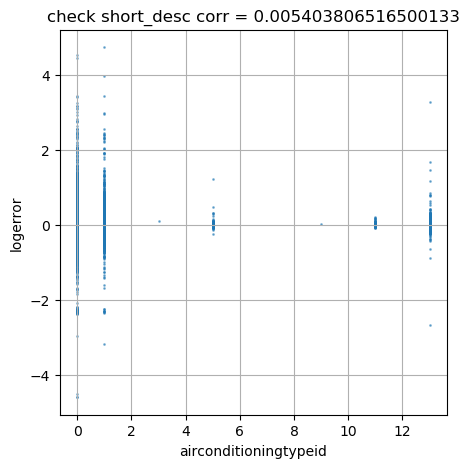

In [101]:
y= df_train_2016['logerror']
x= train_df['airconditioningtypeid']

s = 1
corr = np.corrcoef(x, y)[0, 1]
plt.figure(figsize=(5,5))
plt.title('check short_desc corr = %s'%corr)
plt.xlabel('airconditioningtypeid')
plt.ylabel('logerror')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)

plt.show()

##  Architectural style of the home

There are 90014 missing values out of 90275. Missing values are filled with 0 .  Logerror is high when value is 0. Logerror is low for 261 non-missing values. Need to explore more for 261 values to see how logerror is low. 

In [102]:
train_df['architecturalstyletypeid'].describe()

count    261.000000
mean       7.229885
std        2.716196
min        2.000000
25%        7.000000
50%        7.000000
75%        7.000000
max       21.000000
Name: architecturalstyletypeid, dtype: float64

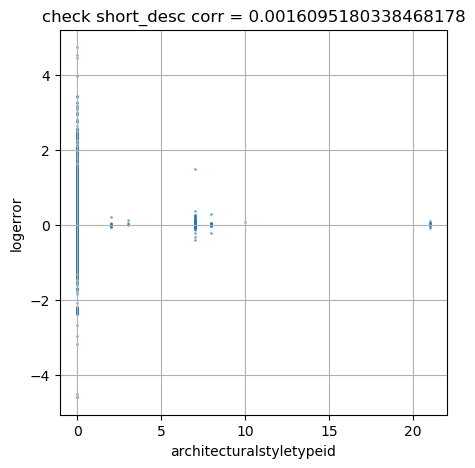

In [103]:
train_df.loc[train_df['architecturalstyletypeid'].isnull(),'architecturalstyletypeid']=0

y= df_train_2016['logerror']
x= train_df['architecturalstyletypeid']

s = 1
corr = np.corrcoef(x, y)[0, 1]
plt.figure(figsize=(5,5))
plt.title('check short_desc corr = %s'%corr)
plt.xlabel('architecturalstyletypeid')
plt.ylabel('logerror')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)

plt.show()

##  Finished living area below or partially below ground level

In [104]:
train_df['basementsqft'].describe()

count      43.000000
mean      713.581395
std       437.434198
min       100.000000
25%       407.500000
50%       616.000000
75%       872.000000
max      1555.000000
Name: basementsqft, dtype: float64

In [105]:
df_train_2016[df_train_2016['basementsqft'].isnull()]['logerror'].describe()

count    90232.000000
mean         0.011433
std          0.161070
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

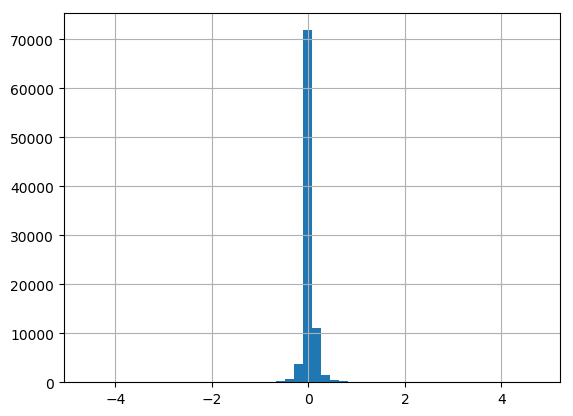

In [106]:
df_train_2016[df_train_2016['basementsqft'].isnull()]['logerror'].hist(bins=50)
plt.show()

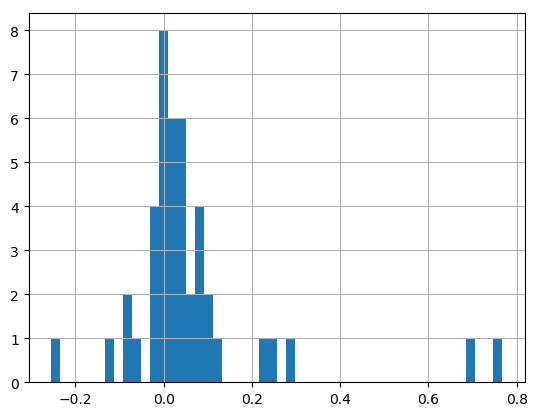

In [107]:
df_train_2016[~df_train_2016['basementsqft'].isnull()]['logerror'].hist(bins=50)
plt.show()

## Number of Bathrooms

In [108]:
df_train_2016['bathroomcnt'].describe()

count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64

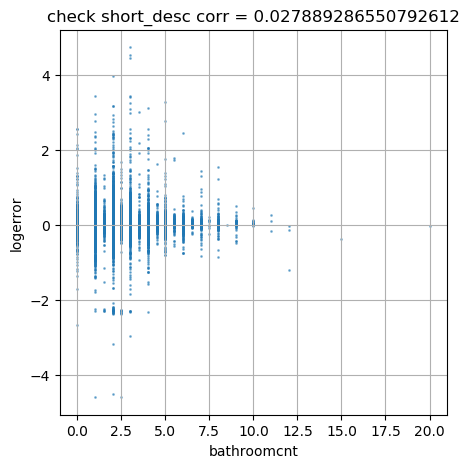

In [109]:
y= df_train_2016['logerror']
x= train_df['bathroomcnt']

s = 1
corr = np.corrcoef(x, y)[0, 1]
plt.figure(figsize=(5,5))
plt.title('check short_desc corr = %s'%corr)
plt.xlabel('bathroomcnt')
plt.ylabel('logerror')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)

plt.show()

## County in which the property is located

In [110]:

train_df['regionidcounty'].unique()



array([3101., 1286., 2061.])

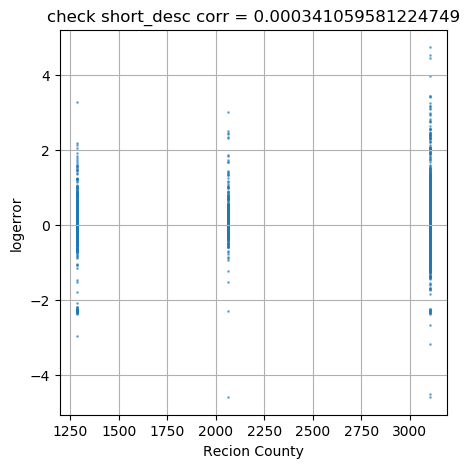

In [111]:
y= df_train_2016['logerror']
x= train_df['regionidcounty']

s = 1
corr = np.corrcoef(x, y)[0, 1]
plt.figure(figsize=(5,5))
plt.title('check short_desc corr = %s'%corr)
plt.xlabel('Recion County')
plt.ylabel('logerror')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)

plt.show()

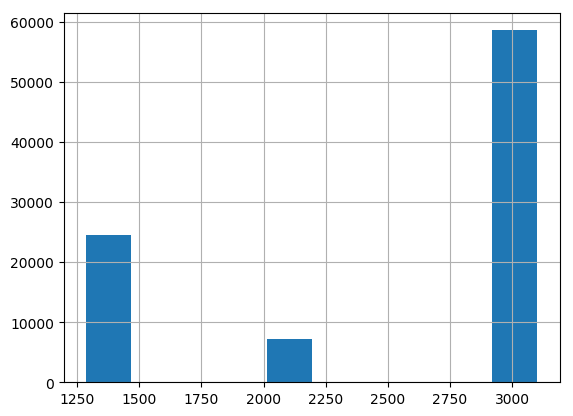

In [112]:
train_df['regionidcounty'].hist()
plt.show()